In [4]:
# Import required libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import dataframe_image as dfi

#### Reading in the data

In [5]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

#### Exploring data

In [6]:
# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [36]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [41]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 3.6+ KB


#### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(market_data_df)

In [7]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data,columns = market_data_df.columns,index=market_data_df.index)
# Display sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [43]:
scaled_df.head().to_markdown(tablefmt='grid')

'+--------------+-------------------------------+------------------------------+-------------------------------+-------------------------------+-------------------------------+--------------------------------+------------------------------+\n| coin_id      |   price_change_percentage_24h |   price_change_percentage_7d |   price_change_percentage_14d |   price_change_percentage_30d |   price_change_percentage_60d |   price_change_percentage_200d |   price_change_percentage_1y |\n+==============+===============================+==============================+===============================+===============================+===============================+================================+==============================+\n| bitcoin      |                     0.508529  |                     0.493193 |                     0.7722    |                     0.23546   |                   -0.0674951  |                      -0.355953 |                    -0.251637 |\n+--------------+-------------------

### Find the Best Value for k Using the Original Scaled DataFrame.

1- **Create a list with the number of k-values to try se a range from 1 to 11**<br>
2- **Create an empty list to store the inertia values**<br>
3- **Create a for loop to compute the inertia with each possible value of k**<br>
**Inside the loop:<br>**
&nbsp;&nbsp;&nbsp;&nbsp;**a- Create a KMeans model using the loop counter for the n_clusters<br>
&nbsp;&nbsp;&nbsp;&nbsp;b- Fit the model to the data using the scaled DataFrame<br>
&nbsp;&nbsp;&nbsp;&nbsp;c- Append the model.inertia_ to the inertia list**<br>

4-**Create a dataframe with the data to plot the Elbow curve**<br>
5-**Display the DataFrame**




#### Best K value function definition

In [8]:
def best_k(df):
    """
    This function evaluates the inertia of the KMeans model
    resulting from varying number of clusters.

    Args:
        df: pandas data frame
    

    Returns:
        df: pandas data frame 

"""
    inertia = []
    for k in range(1,11):
        model = KMeans(n_clusters = k, n_init='auto',random_state=0)
        model.fit(df)
        inertia.append(model.inertia_)
    
    elbow_df = pd.DataFrame({'k':[*range(1,11)],'Inertia':inertia})
    elbow_df.set_index('k',inplace=True)
    elbow_df['Inertia'] = elbow_df['Inertia'].round(2)
    return elbow_df

In [9]:
elbow_df = best_k(scaled_df)

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [10]:
elbow_df.head()

,Inertia
k,
1,287.00
2,198.57
3,123.19
4,79.02
5,68.24


#### Plotting inertia values

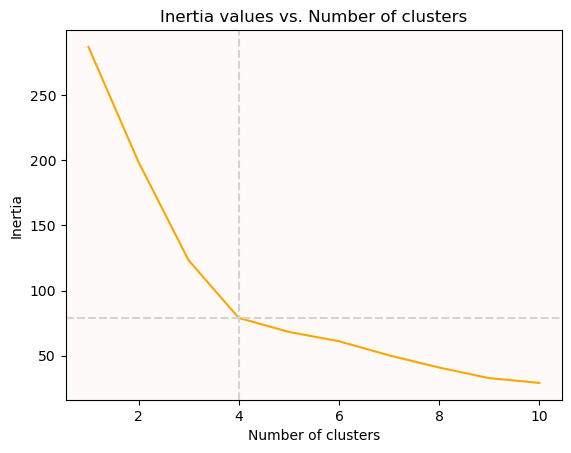

<Figure size 640x480 with 0 Axes>

In [56]:
fig,ax = plt.subplots()
ax.plot(elbow_df.index,elbow_df['Inertia'],color = 'orange')
ax.set_title('Inertia values vs. Number of clusters')
ax.set_facecolor('snow')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')

y = elbow_df.iloc[3].values[0]
plt.axhline(y=y,linestyle = '--',color = 'lightgrey')
plt.axvline(x=4,linestyle = '--',color = 'lightgrey')

plt.show()
plt.savefig('Resources/elbow.png', bbox_inches='tight')
plt.close(fig)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer: 4 because it shows the sharpest change in slope**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

#### Generating K means Model

In [13]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters = 4,n_init='auto',random_state=0)

#### Fitting model

In [14]:
# Fit the K-Means model using the scaled data
k_model.fit(scaled_df)

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=0)

#### Cluster array

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = k_model.predict(scaled_df)

# View the resulting array of cluster values.
preds

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

#### Predicted clusters dataframe

In [16]:
# Create a copy of the DataFrame
clusters_df = scaled_df.copy() 

# Add a new column to the DataFrame with the predicted clusters
clusters_df['crypto_clusters'] = preds

# Display sample data
clusters_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


#### Cluster Viz

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

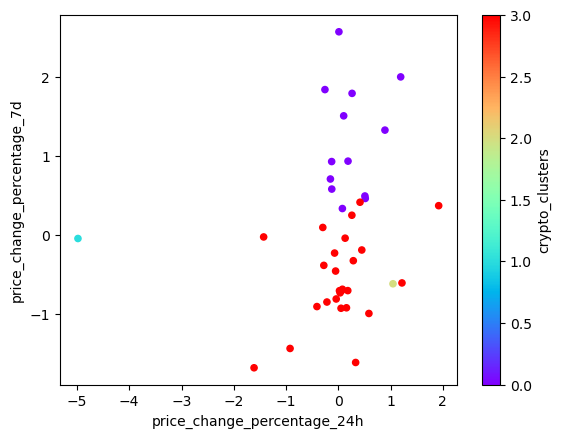

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clusters_df.plot.scatter(x = 'price_change_percentage_24h',
           y = 'price_change_percentage_7d',
           c = 'crypto_clusters',
           cmap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components = 3)

In [19]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
features= pca_model.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
features[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

#### Explained variance ratio

In [20]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [21]:
display(f'The total vairiance explained by the 3 principal components is: {pca_model.explained_variance_ratio_.sum().round(3)}')

'The total vairiance explained by the 3 principal components is: 0.895'

#### Principal components (PCA) dataframe

In [22]:
pca_df = pd.DataFrame(features,index = scaled_df.index,columns = [ 'PCA1','PCA2','PCA3'])
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [23]:
elbow_pca_df = best_k(pca_df)

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [24]:
elbow_pca_df.head(10)

,Inertia
k,
1,256.87
2,168.81
3,93.77
4,49.67
5,39.17
6,32.45
7,21.19
8,19.50
9,13.68


#### Plotting inertia values

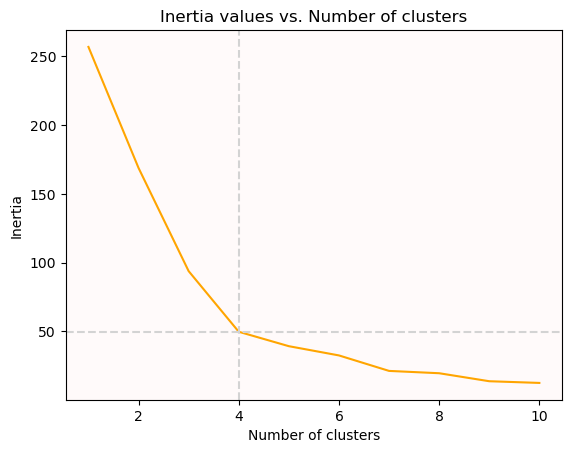

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

fig,ax = plt.subplots()
ax.plot(elbow_pca_df.index,elbow_pca_df['Inertia'],color = 'orange')
ax.set_title('Inertia values vs. Number of clusters')
ax.set_facecolor('snow')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')

y = elbow_pca_df.iloc[3].values[0]
plt.axhline(y=y,linestyle = '--',color = 'lightgrey')
plt.axvline(x=4,linestyle = '--',color = 'lightgrey')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 because is the sharpest change in slope


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The inertia values are different but the number of clusters remain the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
kpca_model = KMeans(n_clusters =4)

In [27]:
# Fit the K-Means model using the PCA data
kpca_model.fit(pca_df)

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = kpca_model.predict(pca_df)

# Print the resulting array of cluster values.
preds

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0])

In [29]:
# Create a copy of the DataFrame with the PCA data
pca_clusters_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clusters_df['crypto_clusters'] = preds

# Display sample data
pca_clusters_df.head()

,PCA1,PCA2,PCA3,crypto_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


#### PCA Clusters Viz

<Axes: xlabel='PCA1', ylabel='PCA2'>

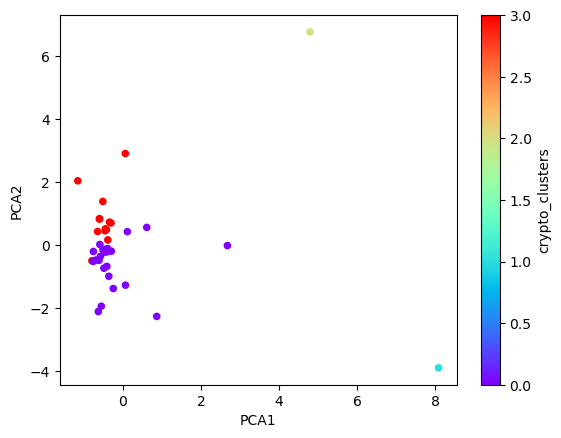

In [30]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_clusters_df.plot.scatter(
           x = 'PCA1',
           y = 'PCA2',
           c = 'crypto_clusters',
           cmap='rainbow')

#### PCA 3D Viz

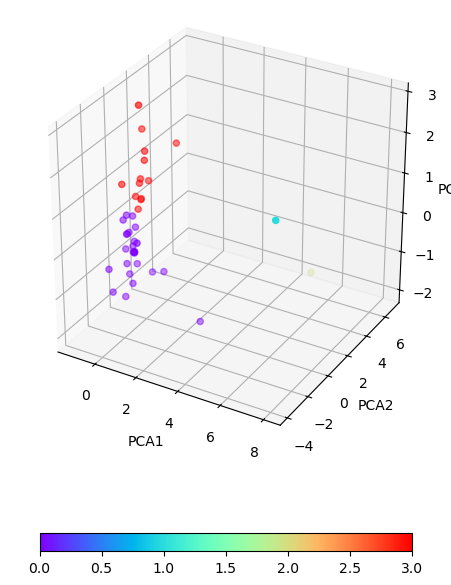

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
x = pca_clusters_df['PCA1']
y = pca_clusters_df['PCA2']
z = pca_clusters_df['PCA3']
c = pca_clusters_df['crypto_clusters']

g = ax.scatter(x,y,z, 
           c = c,
           cmap='rainbow')

ax.set_xlabel('PCA1',)
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.set_box_aspect(aspect = (10,10,10))

fig.colorbar(g,ax=ax,location = 'bottom',shrink =0.6)
plt.show()


### Determine the Weights of Each Feature on each Principal Component

In [32]:
weights_df = pd.DataFrame(pca_model.components_.T.round(3),columns = pca_df.columns,index = scaled_df.columns)
weights_df

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.417,0.358,-0.219
price_change_percentage_7d,-0.102,0.227,0.788
price_change_percentage_14d,-0.009,0.540,0.350
price_change_percentage_30d,0.192,0.562,-0.182
price_change_percentage_60d,0.320,0.434,-0.361
price_change_percentage_200d,0.594,0.028,0.040
price_change_percentage_1y,0.568,-0.151,0.211


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

In [33]:
print(f'The Strongest positive influence is from the "price_change_percentage_7d" feature : {weights_df["PCA3"].max()}')
print(f'The Strongest negative influence is from the "price_change_percentage_24h" feature : {weights_df["PCA1"].min()}')

The Strongest positive influence is from the "price_change_percentage_7d" feature : 0.788
The Strongest negative influence is from the "price_change_percentage_24h" feature : -0.417
